# Objective

- To Identify these risky loan applicants

- To know the variables which are strong indicators of default/to understand the driving factors (or driver variables) behind loan default

In [232]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [233]:
#Import the loan data for analysis
df_loan=pd.read_csv("loan.csv")
pd.set_option('max_columns', None)

In [234]:
#Check the rows and columns
print(df_loan.shape)

(39717, 111)


In [235]:
#check the information of the datasets
print(df_loan.info)

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B        B2   
1       6

In [236]:
#Check the datatype of datasets in respective columns
print(df_loan.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [237]:
df_loan.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 1. Data Cleaning:

In [238]:
# Verify any duplicate rows are available in the given data set
df_loan.duplicated()
#id.nunique()

0        False
1        False
2        False
3        False
4        False
         ...  
39712    False
39713    False
39714    False
39715    False
39716    False
Length: 39717, dtype: bool

In [239]:
#check the id column wethere any duplicate id rows are present
df_loan.id.nunique()

39717

Loan data set does not has any duplicate rows. So start checking the null columns.
Identify the columns that has >50% null values

In [240]:
Col_null_50_per_more = [i for i in df_loan.columns if df_loan[i].isnull().sum() > 0.5* (df_loan.shape[0])]
print(Col_null_50_per_more)

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred

In [241]:
#dropping the columns that has null values as those are not useful for our analysis
df_loan.drop(labels=Col_null_50_per_more, axis=1,inplace=True)

In [242]:
df_loan.shape

(39717, 54)

In [243]:
df_loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [244]:
#Drop the below listed columns as it is not usefull for analysis as it has some unique id or same value repeated in the columns. 
column_list1=['member_id','emp_title','pymnt_plan','url','desc','zip_code','delinq_2yrs','application_type']
df_loan.drop(labels=column_list1, axis=1,inplace=True)

In [245]:
#Checking the columns
df_loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [246]:
df_loan.shape

(39717, 46)

In [247]:
df_loan['emp_length']=df_loan.emp_length.str.extract('(\d+)')

df_loan.emp_length.fillna(0,inplace=True)
df_loan.emp_length.unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7', 0], dtype=object)

In [248]:
df_loan.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,1,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,0.0,1,0,0.0,0,0.0,0.0


In [249]:
#Removing the % symbol from the int_rate, and revol_util columns
df_loan['int_rate'] = df_loan['int_rate'].str.rstrip('%')
df_loan['revol_util'] = df_loan['revol_util'].str.rstrip('%')


In [250]:
df_loan.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,Jan-85,1,3,0,13648,83.70,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,1,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,Apr-99,5,3,0,1687,9.40,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,Nov-01,2,2,0,2956,98.50,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,0.0,1,0,0.0,0,0.0,0.0


In [251]:
# remove the months word from term column and keep it as integer column
df_loan['term']=df_loan.term.str.extract('(\d\d )')
df_loan.emp_length.unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7', 0], dtype=object)

In [252]:
#derive year column from issue date for analysis
df_loan.issue_d = pd.to_datetime(df_loan.issue_d, format='%b-%y')
df_loan['year']=df_loan['issue_d'].dt.year
df_loan.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,Jan-85,1,3,0,13648,83.70,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,1,0,0.0,0,0.0,0.0,2011
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,Apr-99,5,3,0,1687,9.40,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,0,0.0,0,0.0,0.0,2011
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,Nov-01,2,2,0,2956,98.50,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,0.0,1,0,0.0,0,0.0,0.0,2011


## 2. Univarient Analysis

In [253]:
#describe the values to see what all are the features to be analyse to get the best result
df_loan.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0,39717.000000
mean,6.831319e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0,2010.328902
std,2.106941e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0,0.877514
min,5.473400e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,2007.000000
25%,5.162210e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,2010.000000
50%,6.656650e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,2011.000000
75%,8.377550e+05,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,2011.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,2011.000000


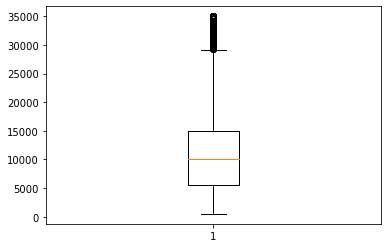

In [254]:
%matplotlib inline
#Create a box plot for the loan amount column to identify the outliers
plt.boxplot(df_loan.loan_amnt)
plt.show()

In [255]:
#verify the installment amount is not greater or equel to the loan amount which is not correct data
df_loan[df_loan.loan_amnt <= df_loan.installment]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year


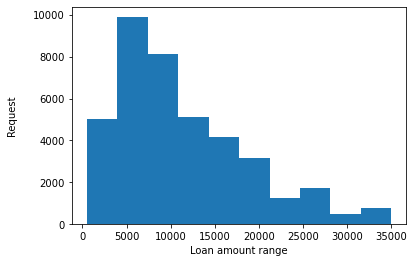

In [256]:
plt.hist(df_loan["loan_amnt"])
plt.xlabel('Loan amount range\n', fontsize = 10)
plt.ylabel('Request\n', fontsize = 10)

plt.show()

#Loan amount request has high from 5000 to 15000 compare to other amount

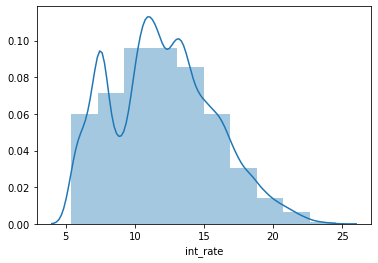

In [257]:
import seaborn as sns
sns.distplot(df_loan.int_rate,bins=10)

plt.show()

#Intrest rate 10 to 15 has a maximum

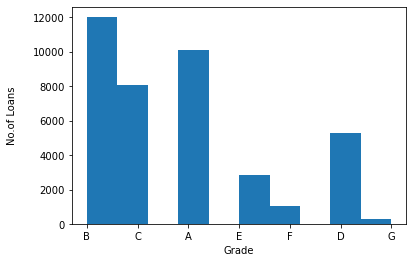

In [258]:
plt.hist(df_loan["grade"])
plt.xlabel('Grade\n', fontsize = 10)
plt.ylabel('No.of Loans\n', fontsize = 10)
plt.show()

#Grade B has more number of loans than others

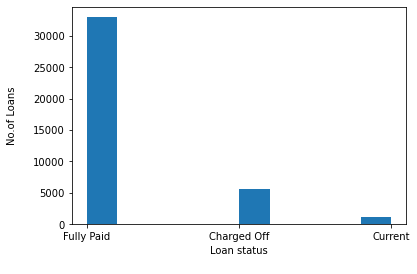

In [259]:
plt.hist(df_loan["loan_status"])
plt.xlabel('Loan status\n', fontsize = 10)
plt.ylabel('No.of Loans\n', fontsize = 10)
plt.show()

In [260]:
df_loan["loan_status"].value_counts()*100/df_loan["loan_status"].count()

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

Approximately 14.17 % loan was charged off. 
Further deep dive on this to find out why these many loan where charged off to understand better 
This helps on the loan approval.

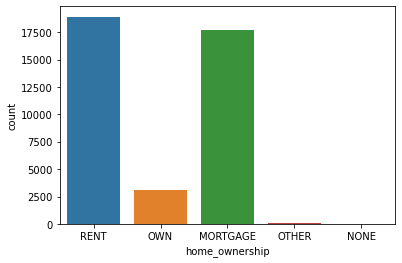

In [261]:
#Rented and mortgage fellows take loan often
sns.countplot(x = 'home_ownership', data = df_loan)

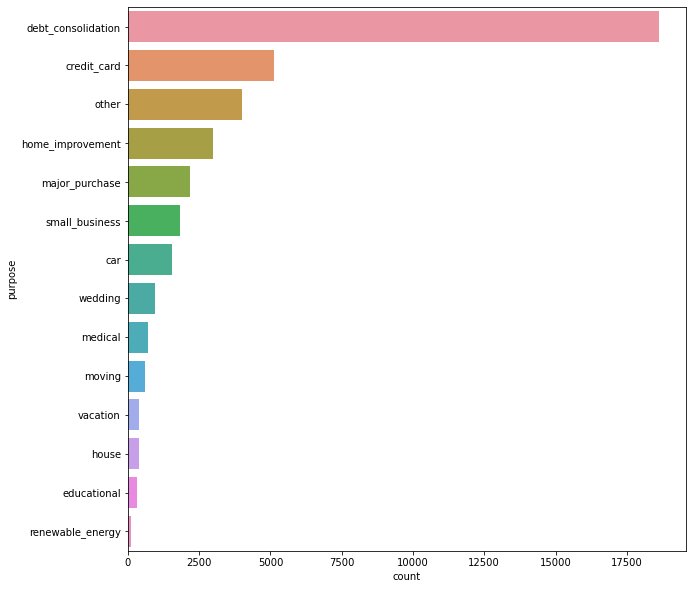

In [262]:
df_loan["purpose"].value_counts()*100/df_loan["purpose"].count()

plt.figure(figsize=(10,10))
sns.countplot(y="purpose", data=df_loan,order = df_loan['purpose'].value_counts().index)


Nearly 47% loans are opted for the debt consolidation purpose and 13% loans are for pay back their cridit card bills.

## 3. Bivariate Analysis

In [263]:
# categorize the loan amounts, annual income, and intrest rate into buckets for further in bivariate analysis.
df_loan['loan_amnt_bins'] = pd.cut(df_loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

df_loan['annual_inc_bins'] = pd.cut(df_loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

df_loan['int_rate']=df_loan['int_rate'].apply(pd.to_numeric)
df_loan['int_rate_group'] = pd.cut(df_loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])


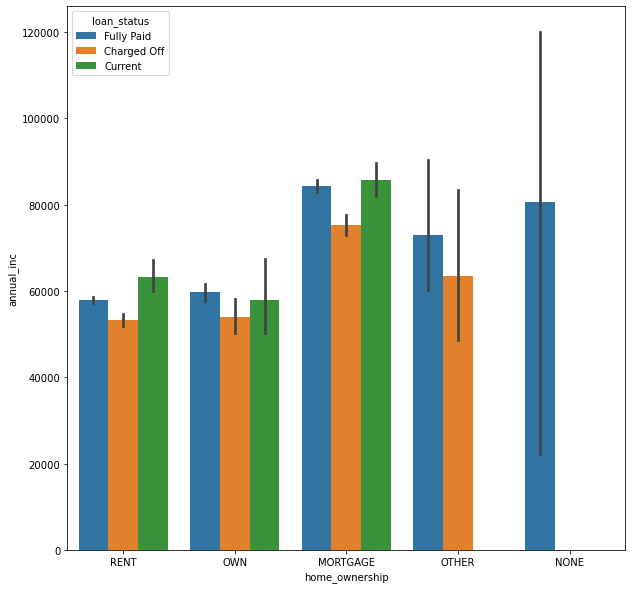

In [264]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_loan,x='home_ownership', y='annual_inc', hue ='loan_status')
plt.show()



People who's 'home_ownership' is on Mortgage are likely to default when their salary is below 80,000/-

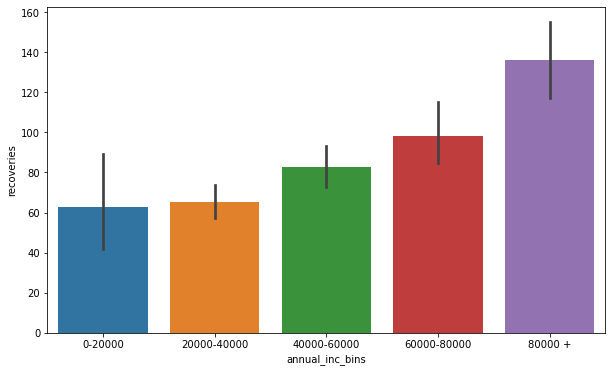

In [265]:
# comparision between the recoveries and annual income
plt.figure(figsize=(10,6))
sns.barplot(data=df_loan, x="annual_inc_bins", y="recoveries")
plt.show()

Recoveries are high where the annual income is high

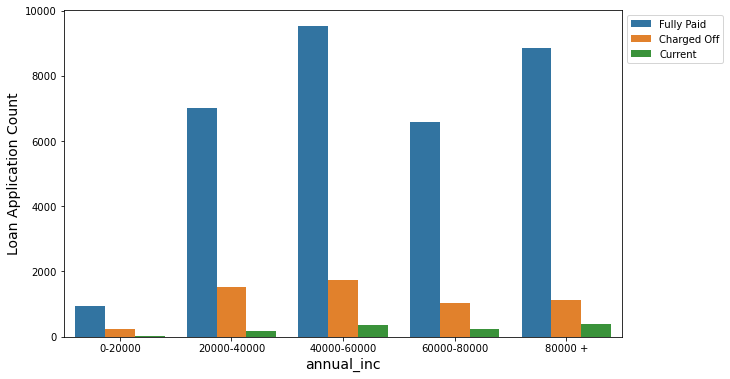

In [266]:
#annual income with loan status to analyse the charged off 
plt.figure(figsize=(10,6))
incomeVsStatus = sns.countplot(x="annual_inc_bins",data=df_loan,hue='loan_status')
incomeVsStatus.legend(bbox_to_anchor=(1, 1))
incomeVsStatus.set_xlabel('annual_inc',fontsize=14)
incomeVsStatus.set_ylabel('Loan Application Count',fontsize=14)      
plt.show()

anual income between 20000 to 60000 has more charged off loans

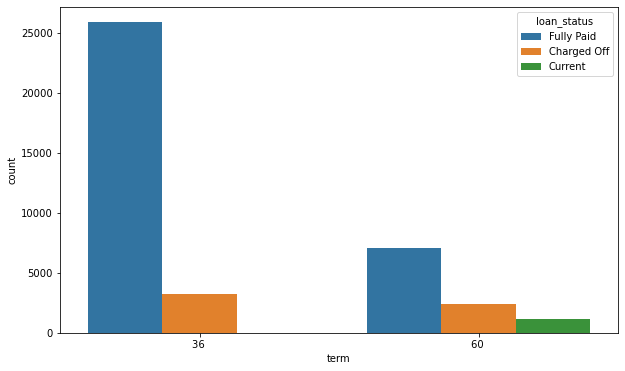

In [267]:
plt.figure(figsize=(10,6))
sns.countplot(x="term",data=df_loan,hue='loan_status')
plt.show()

36 month term has more charged off

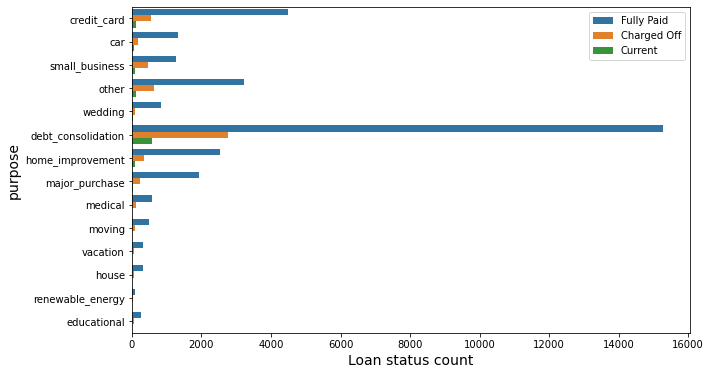

In [268]:
plt.figure(figsize=(10,6))
purpose= sns.countplot(y="purpose",data=df_loan,hue='loan_status')
purpose.legend(bbox_to_anchor=(1, 1))
purpose.set_xlabel('Loan status count',fontsize=14)
purpose.set_ylabel('purpose',fontsize=14)  

plt.show()



Debt consolidation and credit card purpose loan has the more charged off.

## 4. Multivariate analysis

In [269]:
# createe a data set with the grade and status to derive the charged off proportionation
grade_vs_loan = df_loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,101,17,198,316,0.319620
5,F,319,73,657,1049,0.304099
4,E,715,179,1948,2842,0.251583
3,D,1118,222,3967,5307,0.210665
2,C,1347,264,6487,8098,0.166337
1,B,1425,345,10250,12020,0.118552
0,A,602,40,9443,10085,0.059693


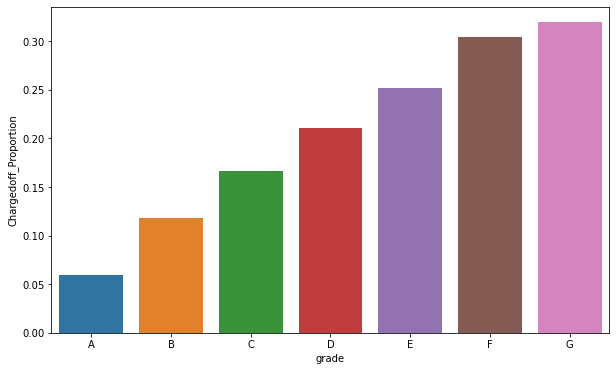

In [270]:
plt.figure(figsize=(10,6))
sns.barplot(data=grade_vs_loan, x="grade", y="Chargedoff_Proportion")
plt.show()

# charged off is linearly increased towards the grade A to G

In [271]:
#create subset of data with subgrade and loan status
subgrade_vs_loan = df_loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
subgrade_vs_loan['Total'] = subgrade_vs_loan['Charged Off'] + subgrade_vs_loan['Current'] + subgrade_vs_loan['Fully Paid'] 
subgrade_vs_loan['Chargedoff_Proportion'] = subgrade_vs_loan['Charged Off'] / subgrade_vs_loan['Total']
subgrade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,54.0,5.0,59.0,118.0,0.457627
32,G3,19.0,3.0,26.0,48.0,0.395833
31,G2,28.0,1.0,49.0,78.0,0.358974
34,G5,10.0,1.0,19.0,30.0,0.333333
28,F4,53.0,17.0,98.0,168.0,0.315476
30,G1,31.0,10.0,63.0,104.0,0.298077
26,F2,70.0,16.0,163.0,249.0,0.281124
23,E4,126.0,30.0,298.0,454.0,0.277533
25,F1,91.0,24.0,214.0,329.0,0.276596
27,F3,51.0,11.0,123.0,185.0,0.275676


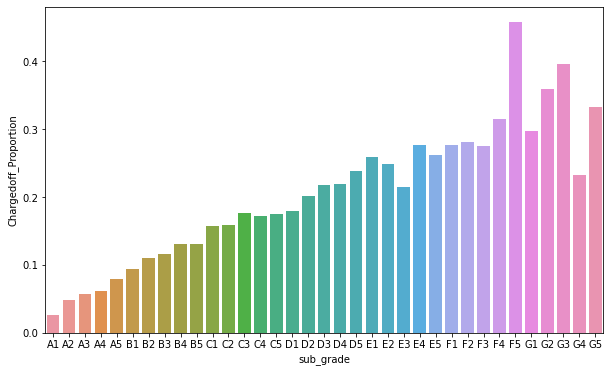

In [272]:
plt.figure(figsize=(10,6))
sns.barplot(data=subgrade_vs_loan, x="sub_grade", y="Chargedoff_Proportion")
plt.show()

#F and G has high charged off values

In [273]:
#create subset of data with intrest rate and loan status
int_vs_loan = df_loan.groupby(['int_rate_group', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_vs_loan['Total'] = subgrade_vs_loan['Charged Off'] + subgrade_vs_loan['Current'] + subgrade_vs_loan['Fully Paid'] 
int_vs_loan['Chargedoff_Proportion'] = subgrade_vs_loan['Charged Off'] / subgrade_vs_loan['Total']
int_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_group,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1266,359,3372,2886.0,0.061677
2,12.5-16,2003,332,9470,1810.0,0.056906
1,10-13,1232,270,8148,1508.0,0.049072
0,0-10,830,77,11486,1139.0,0.026339


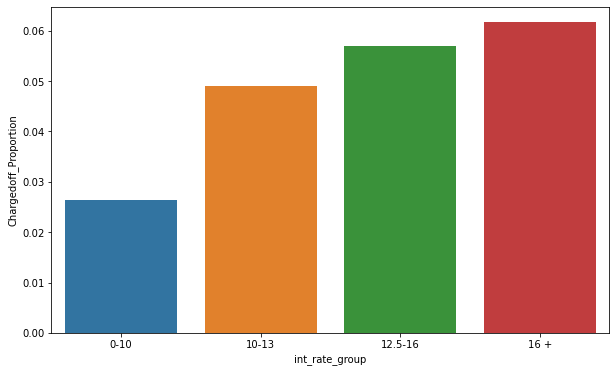

In [274]:
plt.figure(figsize=(10,6))
sns.barplot(data=int_vs_loan, x="int_rate_group", y="Chargedoff_Proportion")
plt.show()

#charged off is very high when the intrest rate is high

In [275]:
#create subset of data with employment length and loan status
emplen_vs_loan = df_loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0,228,42,805,1075,0.212093
2,10,1331,391,7157,8879,0.149904
8,7,263,62,1448,1773,0.148336
1,1,1095,146,6582,7823,0.139972
6,5,458,88,2736,3282,0.139549
7,6,307,61,1861,2229,0.137730
9,8,203,44,1232,1479,0.137255
4,3,555,83,3457,4095,0.135531
5,4,462,94,2880,3436,0.134459
3,2,567,97,3724,4388,0.129216


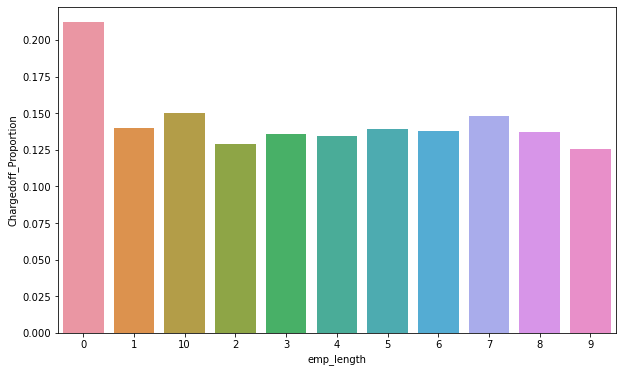

In [276]:
plt.figure(figsize=(10,6))
sns.barplot(data=emplen_vs_loan, x="emp_length", y="Chargedoff_Proportion")
plt.show()

#charged off is high when there is no employment. 

In [277]:
#create subset of data with state and loan status
state_vs_loan = df_loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.0,0.0,2.0,5.0,0.600000
32,NV,108.0,18.0,371.0,497.0,0.217304
0,AK,15.0,2.0,63.0,80.0,0.187500
40,SD,12.0,2.0,50.0,64.0,0.187500
9,FL,504.0,85.0,2277.0,2866.0,0.175855
13,ID,1.0,0.0,5.0,6.0,0.166667
24,MO,114.0,16.0,556.0,686.0,0.166181
11,HI,28.0,8.0,138.0,174.0,0.160920
31,NM,30.0,6.0,153.0,189.0,0.158730
4,CA,1125.0,150.0,5824.0,7099.0,0.158473


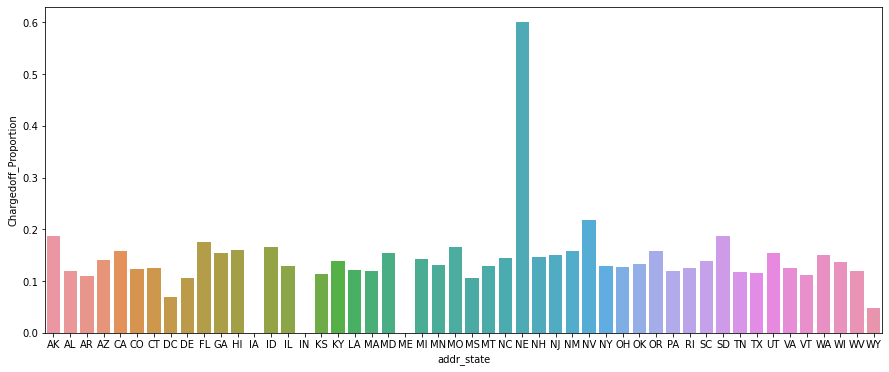

In [278]:
plt.figure(figsize=(15,6))
sns.barplot(data=state_vs_loan, x="addr_state", y="Chargedoff_Proportion")
plt.show()

#NE is looks high charged off values however it has very low total loan application.
#NV, FL and AK has more application and charged off also high relatively. 
#These state needs to additional review to approve the loan 

In [279]:
#create subset of data with year and loan status
year_vs_loan = df_loan.groupby(['year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
year_vs_loan['Total'] = year_vs_loan['Charged Off'] + year_vs_loan['Current'] + year_vs_loan['Fully Paid'] 
year_vs_loan['Chargedoff_Proportion'] = year_vs_loan['Charged Off'] / year_vs_loan['Total']
year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,year,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,2007,45.0,0.0,206.0,251.0,0.179283
1,2008,247.0,0.0,1315.0,1562.0,0.158131
4,2011,3256.0,1140.0,17260.0,21656.0,0.150351
3,2010,1485.0,0.0,10047.0,11532.0,0.128772
2,2009,594.0,0.0,4122.0,4716.0,0.125954


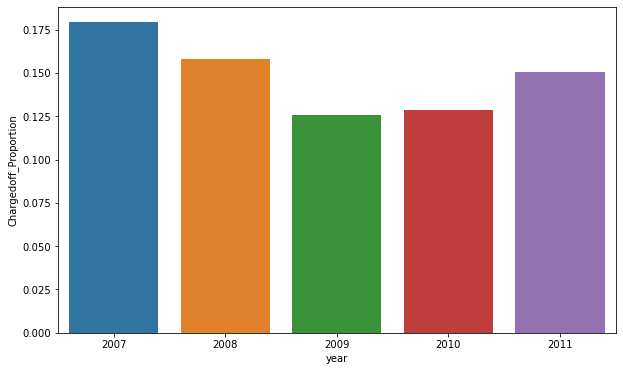

In [280]:
plt.figure(figsize=(10,6))
sns.barplot(data=year_vs_loan, x="year", y="Chargedoff_Proportion")
plt.show()

#Even though the charged off proportion is high in 2007 the total loan application is very less. 
#Comparing to other years 2011 has more loan application and charged off also very high

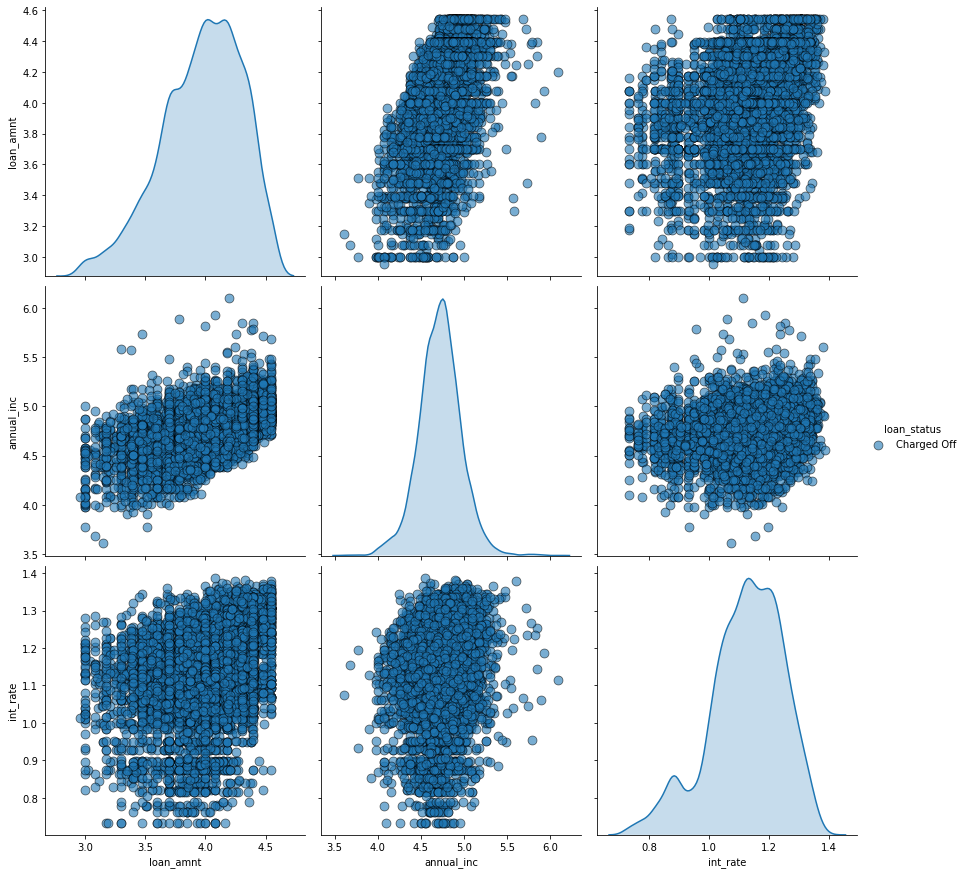

In [281]:
#consider the loan_amnt, annual_inc, int_rate, and loan_status to do multivariate analysis
loan = df_loan[['loan_amnt', 'annual_inc','int_rate','loan_status']].copy()
loan = loan[loan['loan_status']=="Charged Off"]

# Take the log of below variables as they are heavily skewed
loan['loan_amnt'] = np.log10(loan['loan_amnt'])
loan['annual_inc'] = np.log10(loan['annual_inc'])
loan['int_rate'] = np.log10(loan['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan, hue = 'loan_status', diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)
plt.show()

#loan amount is increase when the anual income is increasing
#Intrest rate is increase when the loan amount is increasing
#charged off is increasing when the intrest rate is increasing

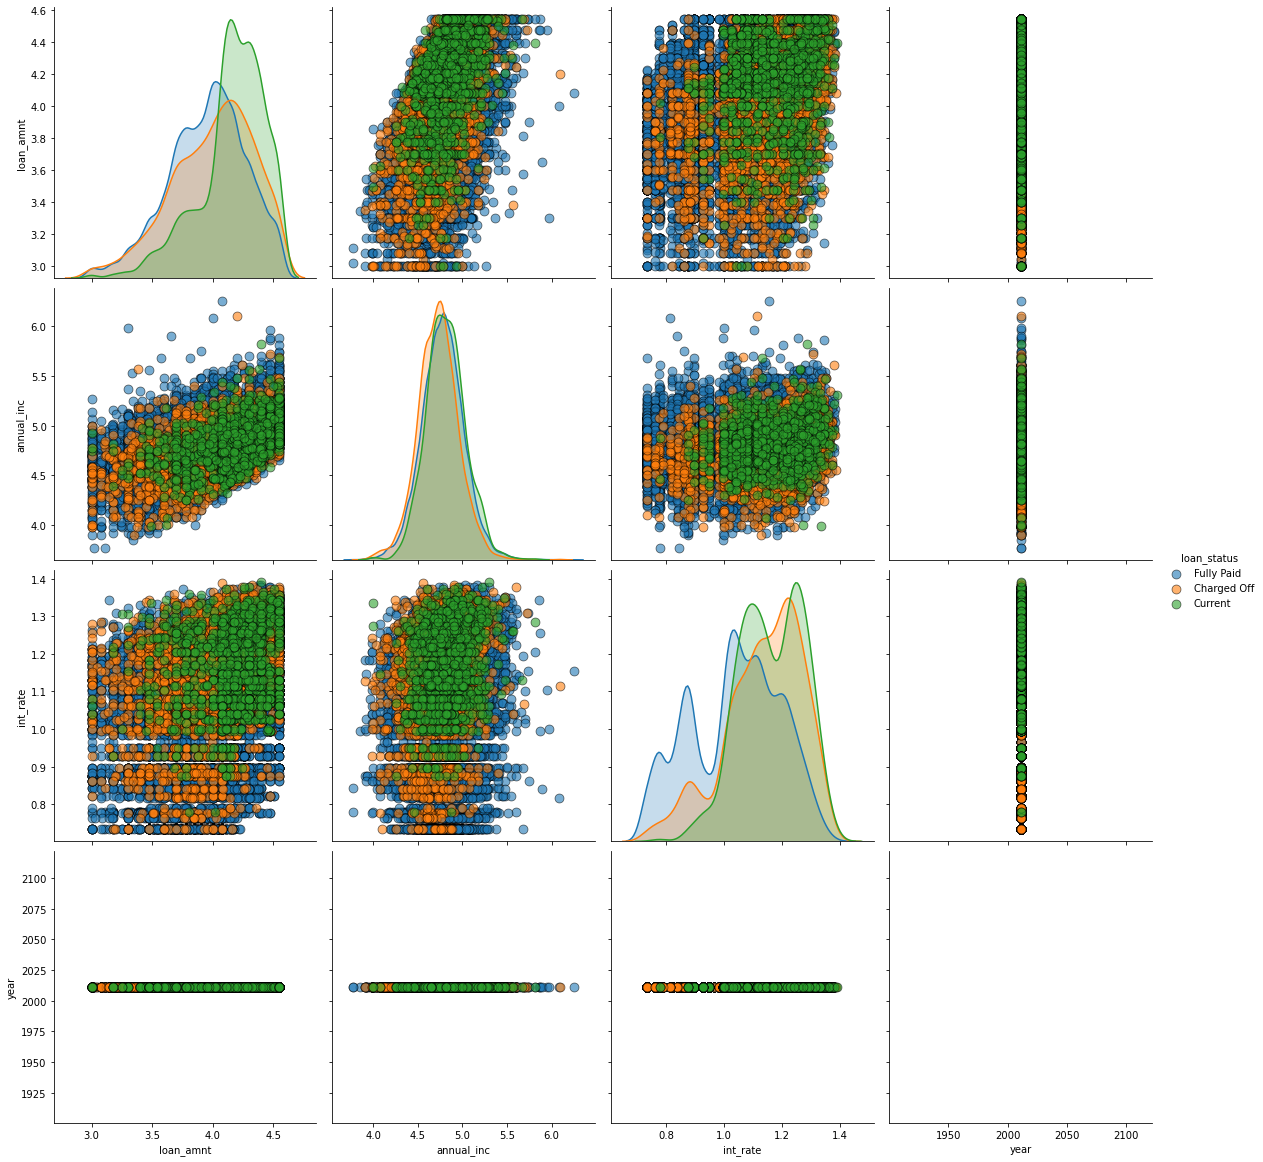

In [282]:
#consider the loan_amnt, annual_inc, int_rate, and loan_status to do multivariate analysis for the year 2011 
# as the charged off is high on 2011.
loan = df_loan[['loan_amnt', 'annual_inc','int_rate','year','loan_status']].copy()
loan = loan[loan['year']==2011]

# Take the log of below variables as they are heavily skewed
loan['loan_amnt'] = np.log10(loan['loan_amnt'])
loan['annual_inc'] = np.log10(loan['annual_inc'])
loan['int_rate'] = np.log10(loan['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan, hue = 'loan_status', diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)
plt.show()

# intrest rate is increase when the loan amount is increase
# Higher charged off when there is an intrest rate increase

## 5. Conclusion

### __"Below are the insights from Univariate analysis"__,

- Fully Paid -32950, Charged Off - 5627, Current - 1140

- Out of total loan sanction, 14% are likely to default the loan

- Max int.rate taken ranged from 10-15%

- People rarely go for >30,000 loan amount, and mostly take loan between 5000-15000

- Taken loans are mostly for Debt consolidation and to pay credit card bills

- Grade B - noticed the highest loan takers of all 

- People who’s ‘home_ownership’ in mortgage and rent seems to take loans often


### __"Below are the insights from Bivariate analysis"__,

- People with bad credit history (Grade - G) most likely to default <br>

-  Suggestion, Loan amount slab can be gradually reduced as per the grade <br>

- People who fall in Grade F & G are most likely to default due to their bad credit score <br>

- People default when they are not employed <br>

- People default when the interest is high <br>

- People from NE most likely to default <br>

- Considering the population being less, recommend to have lowest interest rates for them <br>

- People from NV, FL and AK most likely to default <br>

- 2008 - where charged off was high (may be due to any financial bane) <br>

- People with lower income below 60,000 applying loan with higher amount with higher interest are most likely to default <br>


### Finaly conclusion

- People with bad credit history (Grade - G) most likely to default

- Suggestion, Loan amount slab can be gradually reduced as per the grade

- People who fall in Grade F & G are most likely to default due to their bad credit score

- People default when they are not employed 

- People default when the interest is high

- People from NE most likely to default

- Considering the population being less, recommend to have lowest interest rates for them

- People from NV, FL and AK most likely to default 

- 2008 - where charged off was high (may be due to any financial bane)

- People with lower income below 60,000 applying loan with higher amount with higher interest are most likely to default



#### Driving factors

__"[“purpose”], [“int_rate”],[“annual_inc”],[“funded_amnt”],[“term”],[“grade”],[“addr_state”]"__

